In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import keras
from keras import layers
from keras import ops


In [ ]:
model = keras.Sequential(
    [

        layers.Input(shape = [64, 64, 3]),
        layers.Conv2D(filters = 32,kernel_size = 3,activation = 'relu'),
        layers.MaxPooling2D(2),
        layers.BatchNormalization(axis = -1),
        layers.Dropout(0.2),

        layers.Conv2D(filters = 32,kernel_size = 3,activation = 'relu'),
        layers.MaxPooling2D(2),
        layers.BatchNormalization(axis = -1),
        layers.Dropout(0.2),

        layers.Flatten(),

        layers.Dense(units = 512, activation = 'relu'),
        layers.BatchNormalization(axis = -1),
        layers.Dropout(0.2),

        layers.Dense(units = 256, activation = 'relu'),
        layers.BatchNormalization(axis = -1),
        layers.Dropout(0.2),

        layers.Dense(units = 36, activation = 'softmax'),

    ]
)

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 31, 31, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,365,828 (12.84 MB)

 Trainable params: 3,364,164 (12.83 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [13]:
training_set = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


In [14]:
validation_set = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',

    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


In [ ]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 32)

In [ ]:
model.save('new_trained_model.keras')


In [15]:
testing_set = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    image_size = (64,64),
    label_mode = 'categorical',
)

Found 367 files belonging to 36 classes.


In [16]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [17]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/new_trained_model.keras')


test_dir = '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test'
def test_class(class_name):
    class_path = os.path.join(test_dir, class_name)

    if os.path.isdir(class_path):

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            img = load_img(image_path, target_size=[64, 64])
            input_arr = img_to_array(img) / 255.0
            input_arr = np.expand_dims(img_to_array(img), axis=0)

            prediction = cnn.predict(input_arr)
            predicted_label = testing_set.class_names[np.argmax(prediction)]

            plt.imshow(plt.imread(image_path))
            plt.title(f"Predicted: {predicted_label}\nActual: {class_name}")
            plt.show()

    else:
        print(f"No Class named '{class_name}'")

while True:
    class_name = input("Class name or exit: ")
    if class_name.lower() == 'exit':
        break
    test_class(class_name)

Class name or exit: exit


In [18]:
loss, accuracy = cnn.evaluate(validation_set)

print(f"Validation Set evaluation:\nLoss: {loss:.4f}\nAccuracy: {accuracy:.4%}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.9329 - loss: 0.3847
Validation Set evaluation:
Loss: 0.2836
Accuracy: 94.5869%


In [19]:
loss, accuracy = cnn.evaluate(training_set)

print(f"Training Set evaluation:\nLoss: {loss:.4f}\nAccuracy: {accuracy:.4%}")

98/98 ━━━━━━━━━━━━━━━━━━━━ 570s 6s/step - accuracy: 0.9904 - loss: 0.0273
Training Set evaluation:
Loss: 0.0286
Accuracy: 98.9406%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


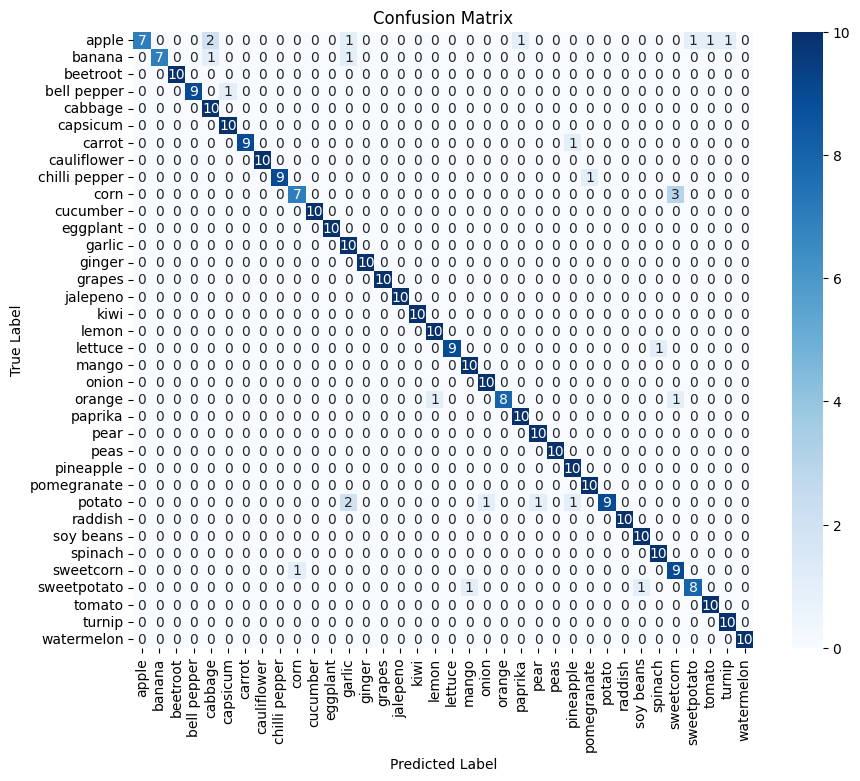

               precision    recall  f1-score   support

        apple       1.00      0.50      0.67        14
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.90      0.95        10
      cabbage       0.77      1.00      0.87        10
     capsicum       0.91      1.00      0.95        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       0.88      0.70      0.78        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.71      1.00      0.83        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10
         kiwi       1.00      1.00      1.00        10
        l

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

true_labels = []
predicted_labels = []

for images, labels in testing_set:
    true_labels.extend(np.argmax(labels.numpy(), axis=1))
    predictions = cnn.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=testing_set.class_names,
            yticklabels=testing_set.class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=testing_set.class_names)
print(report)

In [21]:
loss, accuracy = cnn.evaluate(testing_set)

print(f"Test Set evaluation:\nLoss: {loss:.4f}\nAccuracy: {accuracy:.4%}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9241 - loss: 0.4900
Test Set evaluation:
Loss: 0.4053
Accuracy: 92.9155%
